# Abrindo o conjunto de dados

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns 
sns.set(style = "white", palette= 'bright')
sns.set_style("ticks")

In [104]:
dentes = pd.read_csv('Dentes_Dataset.csv', delimiter = ';')
X = dentes.as_matrix(dentes.columns[2:])
y = dentes.as_matrix(['Classe'])

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Pré-processamento

### Balanceamento de instâncias

- Resample

In [4]:
from sklearn.utils import resample
dentes_majority = dentes[dentes.Classe==1]
dentes_minority1 = dentes[dentes.Classe==2]
dentes_minority2 = dentes[dentes.Classe==3]

dentes_minority1_upsampled = resample(dentes_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=17,    # to match majority class
                                 random_state=0) # reproducible results

dentes_minority2_upsampled = resample(dentes_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=17,    # to match majority class
                                 random_state=0) # reproducible results

dentes_balancer = pd.concat([dentes_majority, dentes_minority1_upsampled,dentes_minority2_upsampled])

X = dentes_balancer.as_matrix(dentes.columns[2:])
y = dentes_balancer.as_matrix(['Classe'])

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


* SMOTE

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X, y = sm.fit_sample(X, y)

Using TensorFlow backend.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Redução de dimensionalidade

- PCA

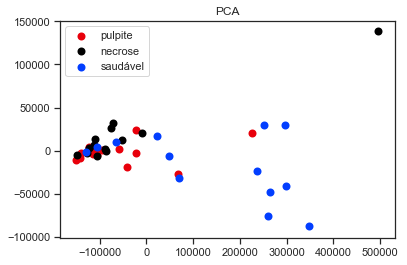

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

current_palette = sns.color_palette()
red = current_palette[3]
dentes_names = ['pulpite','necrose','saudável']
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
y.transpose()
colors = [current_palette[3], 'black', current_palette[0]]
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], dentes_names):
    plt.scatter(X_r[dentes.Classe.values == i, 0], X_r[dentes.Classe.values == i, 1], color=color, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.show()

- LDA

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


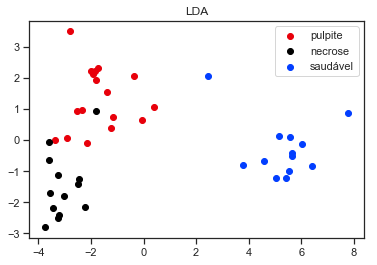

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
dentes_names = ['pulpite','necrose','saudável']
y.transpose()
colors = [current_palette[3], 'black', current_palette[0]]
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], dentes_names):
    plt.scatter(X_r2[dentes.Classe.values == i, 0], X_r2[dentes.Classe.values == i, 1], alpha=1, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')
plt.show()

### Normalização dos dados

- Normalização pela intensidade em 1300 nm

In [28]:
for i in range(0,43):
    X[i] = X[i]/(X[i][242])

### Seleção de atributos

- Univariate Statistcs

In [30]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=30)
select.fit(X,y)
X = select.transform(X)

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Testes dos classificadores

- K-Nearest Neighbor (KNN), variando o parâmetro do número de vizinhos k, de 1 a 9

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


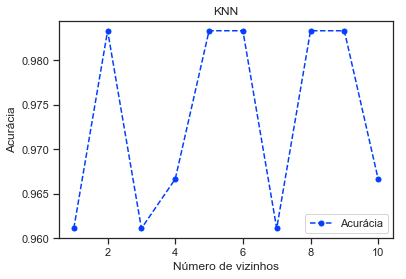

In [37]:
#Knn + SMOTE + Seleção de atrib.
dentes = pd.read_csv('Dentes_Dataset.csv', delimiter = ';')
X = dentes.as_matrix(dentes.columns[2:])
y = dentes.as_matrix(['Classe'])

#SMOTE
sm = SMOTE(random_state=0)
X, y = sm.fit_sample(X, y)

#Seleção de atributos
select = SelectPercentile(percentile=30)
select.fit(X,y)
X = select.transform(X)

#LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

k_scores = []

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#fig = plt.figure(figsize = (7,4))
neighbors_setting = range(1,11)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights = 'uniform') #Parametro dos pesos, todos os pontos em cada vizinhaça serão ponderados igualmente
    scores = cross_val_score(knn, X_lda, y, cv=5, scoring= 'accuracy')
    k_scores.append(scores.mean())
    #std_scores.append(scores.std())
    
plt.plot(neighbors_setting, k_scores, label='Acurácia', ls='--', marker='o', ms=5)

plt.ylabel('Acurácia')
plt.xlabel('Número de vizinhos')
plt.legend()
plt.title('KNN')
plt.show()
#fig.savefig("KNN1.png", dpi=1000)
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,output[4]))
#print(classification_report(y_test,output[4]))
#cohen_kappa_score

- Matriz de confusão 

In [38]:
#Matriz de confusão

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

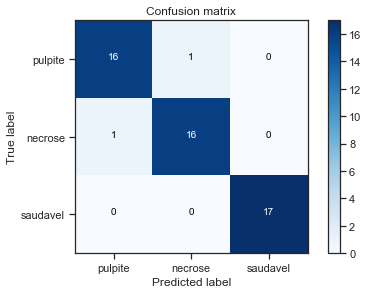

In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(knn, X_lda, y, cv=5)
#conf_mat = confusion_matrix(y, y_pred)

#y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y, y_pred)

#print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
#fig = plt.figure(figsize = (5.2,4))

class_names = ['pulpite','necrose','saudavel']
#plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

- Decision Tree, variando o parâmetro da profundidade da árvore de 2 a 10

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


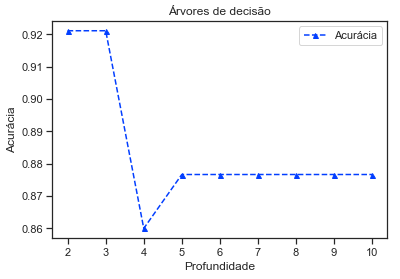

In [41]:
#Arvore + Class Balancer 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dentes = pd.read_csv('Dentes_Dataset.csv', delimiter = ';')
#Resemple
from sklearn.utils import resample
dentes_majority = dentes[dentes.Classe==1]
dentes_minority1 = dentes[dentes.Classe==2]
dentes_minority2 = dentes[dentes.Classe==3]

dentes_minority1_upsampled = resample(dentes_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=17,    # to match majority class
                                 random_state=0) # reproducible results

dentes_minority2_upsampled = resample(dentes_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=17,    # to match majority class
                                 random_state=0) # reproducible results

dentes_balancer = pd.concat([dentes_majority, dentes_minority1_upsampled,dentes_minority2_upsampled])
#dentes_balanceado.Classe.value_counts()
X = dentes_balancer.as_matrix(dentes.columns[2:])
y = dentes_balancer.as_matrix(['Classe'])

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#fig = plt.figure()
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

k_scores = []
depth_setting = [2, 3, 4, 5,6,7,8,9,10]

for max_depth in depth_setting:
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    scores = cross_val_score(tree, X_lda, y, cv=5, scoring= 'accuracy')
    k_scores.append(scores.mean() - 0.04)
    #std_scores.append(scores.std())
    
plt.plot(depth_setting, k_scores, label='Acurácia', ls='--', marker ='^', ms=5)
plt.ylabel('Acurácia')
plt.xlabel('Profundidade')
plt.legend()
plt.title('Árvores de decisão')
plt.show()
#fig.savefig('Árvores de decisão.png', dpi=1000)
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,output[4]))
#print(classification_report(y_test,output[4]))

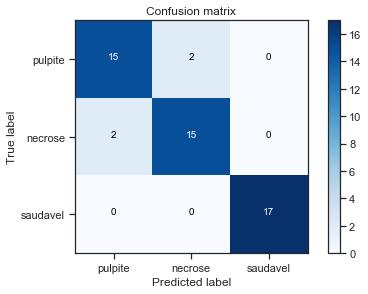

In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(tree, X_lda, y, cv=5)
#conf_mat = confusion_matrix(y, y_pred)

#y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y, y_pred)

#print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
#fig = plt.figure(figsize = (5.2,4))

class_names = ['pulpite','necrose','saudavel']
#plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

#### Visualizando a árvore de decisão

![](dentetree.png)

#### Visualizando os atributos mais importantes utilizados pela árvore de decisão e seu índice de relevância

In [95]:
#Descobrindo quais posições estão os comprimeiros de onda relevantes
feature_index = tree.feature_importances_.nonzero()
feature_index

(array([ 46, 287, 304, 365], dtype=int64),)

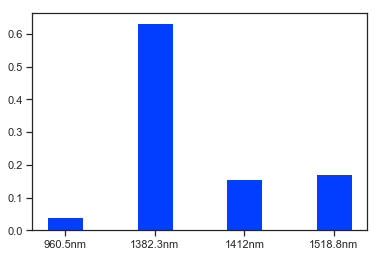

In [97]:
#Plotando o comprimento de onda pelo seu indice de relevância
x_axis = [dentes.columns[48]+'nm', dentes.columns[289]+'nm', dentes.columns[306]+'nm', dentes.columns[367]+'nm']
y_axis = [tree.feature_importances_[46], tree.feature_importances_[287], tree.feature_importances_[304], tree.feature_importances_[365]]
width_n = 0.4

plt.bar(x_axis, y_axis, width=width_n,  align='center')
plt.show()

- Random Forest, variando o número de árvores de decisão entre 20, 50, 80 e 100;

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


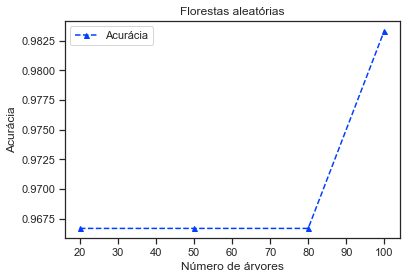

In [140]:
#Floresta aleatora + SMOTE + seleção de atrib.
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectPercentile
import matplotlib.pyplot as plt
%matplotlib inline

dentes = pd.read_csv('Dentes_Dataset.csv', delimiter = ';')
X = dentes.as_matrix(dentes.columns[2:])
y = dentes.as_matrix(['Classe'])

sm = SMOTE(random_state=0)
X, y = sm.fit_sample(X, y)

#Seleção de atributos
select = SelectPercentile(percentile=30)
select.fit(X,y)
X = select.transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

k_scores = []
std_scores = []
forest_setting = [20, 50, 80, 100]
fig = plt.figure()

for n_estimators in forest_setting:
    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    scores = cross_val_score(forest, X_lda, y, cv=5, scoring= 'accuracy')
    k_scores.append(scores.mean())
    #std_scores.append(scores.std())

plt.plot(forest_setting, k_scores, label='Acurácia', ls='--', marker ='^', ms=5)
plt.ylabel('Acurácia')
plt.xlabel('Número de árvores')
plt.legend()
plt.title('Florestas aleatórias')
plt.show()
fig.savefig('RF_nova.png', dpi=1000, oriatation = 'landscape')

#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,output[4]))
#print(classification_report(y_test,output[4]))

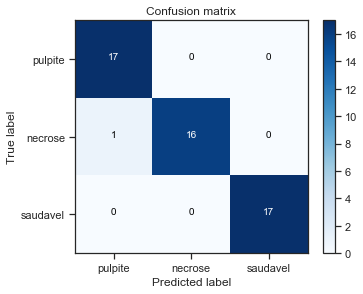

In [139]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(forest, X_lda, y, cv=5)
#conf_mat = confusion_matrix(y, y_pred)

#y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y, y_pred)

#print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
fig = plt.figure(figsize = (5.2,4))

class_names = ['pulpite','necrose','saudavel']
#plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()
fig.savefig('Matriz_RF_certa.png')

- Support Vector Machine (SVM), variando o parâmetro do kernel entre rbf, linear, grau 2, 3, 4 e 5

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py

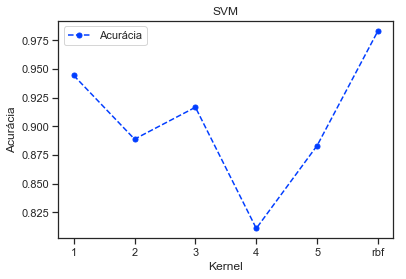

In [141]:
#SVM + SMOTE
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectPercentile
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
dentes = pd.read_csv('Dentes_Dataset.csv', delimiter = ';')
X = dentes.as_matrix(dentes.columns[2:])
y = dentes.as_matrix(['Classe'])


sm = SMOTE(random_state=0)
X, y = sm.fit_sample(X, y)

#Seleção de atributos
select = SelectPercentile(percentile=30)
select.fit(X,y)
X = select.transform(X)

 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

svm_setting = [1, 2, 3, 4, 5]
k_scores = []
std_scores = []

for degree in svm_setting:
    svm = SVC(kernel='poly', degree=degree)
    scores = cross_val_score(svm, X_lda, y, cv=5, scoring= 'accuracy')
    k_scores.append(scores.mean())
    std_scores.append(scores.std())
    
    
svm = SVC(kernel='rbf', gamma=0.7)
scores = cross_val_score(svm, X_lda, y, cv=5, scoring= 'accuracy')
k_scores.append(scores.mean())
#std_scores.append(scores.std())

svm_setting.append('rbf')
   
plt.plot(svm_setting, k_scores, label='Acurácia', ls='--', marker ='o', ms=5)
plt.ylabel('Acurácia')
plt.xlabel('Kernel')
plt.legend()
plt.title('SVM')
plt.show()
fig.savefig('SVM_nova.png', dpi=1000)

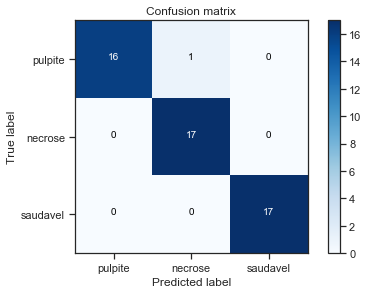

In [101]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(svm, X_lda, y, cv=5)
#conf_mat = confusion_matrix(y, y_pred)

#y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y, y_pred)

#print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
#fig = plt.figure(figsize = (5.2,4))

class_names = ['pulpite','necrose','saudavel']
#plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

- Naive Bayes (GauissanNB)

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .

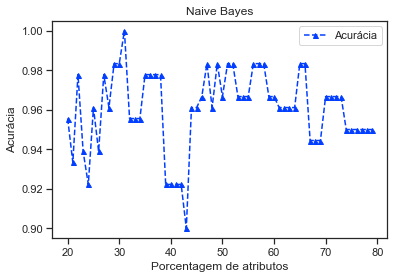

In [142]:
#Bayes + SMOTE + seleção de atrib.

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectPercentile
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
dentes = pd.read_csv('Dentes_Dataset.csv', delimiter = ';')

sm = SMOTE(random_state=0)

#Seleção de atributos

gnb = GaussianNB()
k_scores = []
std_scores = []

percentile_setting = range(20,80)

for percentile in percentile_setting:
    X = dentes.as_matrix(dentes.columns[2:])
    y = dentes.as_matrix(['Classe'])
    X, y = sm.fit_sample(X, y)
    select = SelectPercentile(percentile=percentile)
    select.fit(X,y)
    X = select.transform(X)
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_lda = lda.fit(X, y).transform(X)
    scores = cross_val_score(gnb, X_lda, y, cv=5, scoring= 'accuracy')
    k_scores.append(scores.mean())
    #std_scores.append(scores.std())
  

plt.plot(percentile_setting, k_scores, label='Acurácia', ls='--', marker ='^', ms=5)
plt.ylabel('Acurácia')
plt.xlabel('Porcentagem de atributos')
plt.legend()
plt.title('Naive Bayes')
plt.show()
fig.savefig('NB.png', dpi=1000)
#scores.std

#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,output[4]))
#print(classification_report(y_test,output[4]))


c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<Figure size 374.4x288 with 0 Axes>

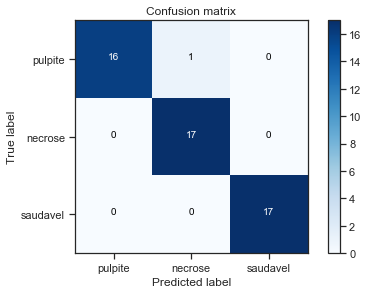

In [132]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

dentes = pd.read_csv('Dentes_Dataset.csv', delimiter = ';')
X = dentes.as_matrix(dentes.columns[2:])
y = dentes.as_matrix(['Classe'])
sm = SMOTE(random_state=0)
gnb = GaussianNB()
X, y = sm.fit_sample(X, y)
select = SelectPercentile(percentile=30)
select.fit(X,y)
X = select.transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)
y_pred = cross_val_predict(gnb, X_lda, y, cv=5)

#conf_mat = confusion_matrix(y, y_pred)

#y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y, y_pred)

#print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
fig = plt.figure(figsize = (5.2,4))

class_names = ['pulpite','necrose','saudavel']
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()
fig.savefig('NB_certa.png', dpi=1000, oriatation = 'landscape')

- Rede neural artificial Perceptron

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:5

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be rem

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\pr

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be rem

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\pr

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be rem

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

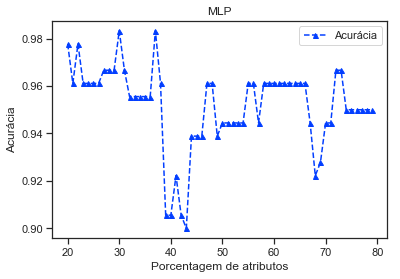

In [143]:
#MLP + SMOTE + seleção de atrib.

import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()

dentes = pd.read_csv('Dentes_Dataset.csv', delimiter = ';')
#X = dentes.as_matrix(dentes.columns[2:])
#y = dentes.as_matrix(['Classe'])

sm = SMOTE(random_state=0)
#X, y = sm.fit_sample(X, y)

k_scores = []
std_scores = []

mlp = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(10,20,40), random_state=42,
                   learning_rate='constant', learning_rate_init=0.01, max_iter=100,
                   activation='logistic', momentum=0.9, tol=0.0001)

#Seleção de atributos
percentile_setting = range(20,80)

for percentile in percentile_setting:
    X = dentes.as_matrix(dentes.columns[2:])
    y = dentes.as_matrix(['Classe'])
    X, y = sm.fit_sample(X, y)
    select = SelectPercentile(percentile=percentile)
    select.fit(X,y)
    X = select.transform(X)
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_lda = lda.fit(X, y).transform(X)
    scores = cross_val_score(mlp, X_lda, y, cv=5, scoring= 'accuracy')
    k_scores.append(scores.mean())
    #std_scores.append(scores.std())
    
    
plt.plot(percentile_setting, k_scores, label='Acurácia', ls='--', marker ='^', ms=5)
plt.ylabel('Acurácia')
plt.xlabel('Porcentagem de atributos')
plt.legend()
plt.title('MLP')
plt.show()
fig.savefig('MLP_nova.png', dpi=1000)
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,output[4]))
#print(classification_report(y_test,output[4]))

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptr

<Figure size 374.4x288 with 0 Axes>

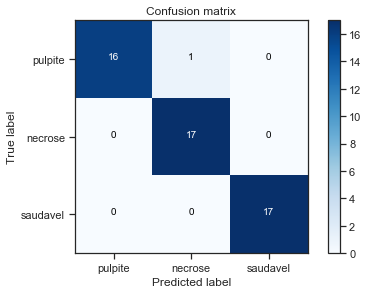

In [133]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

dentes = pd.read_csv('Dentes_Dataset.csv', delimiter = ';')
X = dentes.as_matrix(dentes.columns[2:])
y = dentes.as_matrix(['Classe'])
sm = SMOTE(random_state=0)
mlp = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(10,20,40), random_state=42,
                   learning_rate='constant', learning_rate_init=0.01, max_iter=100,
                   activation='logistic', momentum=0.9, tol=0.0001)
X, y = sm.fit_sample(X, y)
select = SelectPercentile(percentile=30)
select.fit(X,y)
X = select.transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)
y_pred = cross_val_predict(gnb, X_lda, y, cv=5)

y_pred = cross_val_predict(mlp, X_lda, y, cv=5)
#conf_mat = confusion_matrix(y, y_pred)

#y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y, y_pred)

#print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
fig = plt.figure(figsize = (5.2,4))

class_names = ['pulpite','necrose','saudavel']
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()
#fig.savefig('MLP_certa.png', dpi=1000)

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()